In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from scipy.stats import zscore

In [53]:
df = pd.read_csv("testdata.csv")

In [54]:
df.head

<bound method NDFrame.head of            id                           Model  Year Company    Price  Engine  \
0   200716453                Honda N Box 2019  2019   Honda  3750000     660   
1   200716455         Honda N WGN Custom 2018  2017   Honda  3300000     658   
2   200716452           Honda S660 Alpha 2017  2017   Honda  3885000     658   
3   200701070     Honda Fit GP5 RS Grade 2015  2015   Honda  3890000    1496   
4   200716458        Honda Fit GP5 Sport 2014  2014   Honda  3275000    1496   
5   200716456              Honda Fit GP5 2013  2013   Honda  3285000    1496   
6   200716459              Honda Fit GP5 2014  2014   Honda  3375000    1496   
7   200716457             Honda Grace EX 2015  2015   Honda  4550000    1496   
8   200716451             Honda Grace EX 2018  2018   Honda  6450000    1496   
9   200714223        Honda Grace Sensing 2018  2018   Honda  6490000    1496   
10  200714226  Honda Civic SR 1.0L Turbo 2018  2018   Honda  6100000    1000   
11  200714

In [55]:
df["Transmission"] = df["Transmission"].astype(str)

In [56]:
df= df[(df['Year']>=1990)&(df['Year']<=2020)]
print(df.Year)

0     2019
1     2017
2     2017
3     2015
4     2014
5     2013
6     2014
7     2015
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2014
16    2016
17    2017
18    2018
19    2018
Name: Year, dtype: int64


Text(0, 0.5, 'Price')

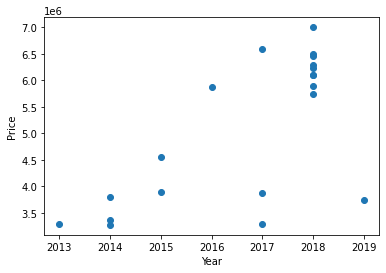

In [57]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Year")
plt.ylabel("Price")

In [58]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int64
FuelType        object
Transmission    object
Age              int64
Mileage          int64
dtype: object

In [59]:
df.dtypes

id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int64
FuelType        object
Transmission    object
Age              int64
Mileage          int64
dtype: object

In [60]:
df = df.astype({"Engine": int, "Age": int})

Text(0, 0.5, 'Price')

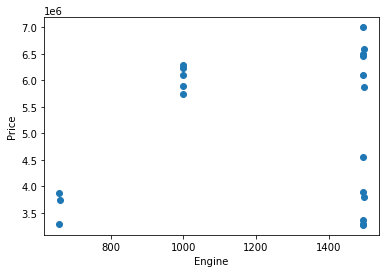

In [61]:
plt.scatter(df['Engine'], df['Price'])
plt.xlabel("Engine")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

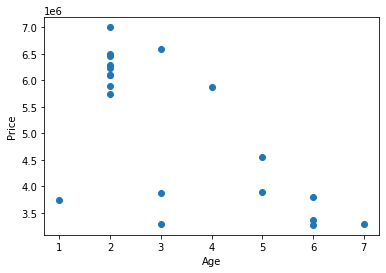

In [62]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

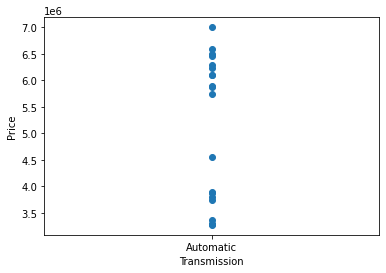

In [63]:
plt.scatter(df['Transmission'], df['Price'])
plt.xlabel("Transmission")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

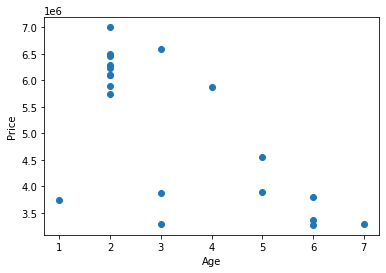

In [64]:
plt.scatter(df['Age'], df['Price'])
plt.xlabel("Age")
plt.ylabel("Price")

In [65]:
df["FuelType"] = df["FuelType"].astype(str)

Text(0, 0.5, 'Price')

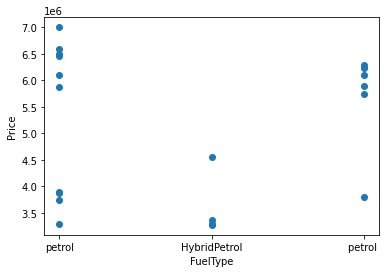

In [66]:
plt.scatter(df['FuelType'], df['Price'])
plt.xlabel("FuelType")
plt.ylabel("Price")

In [67]:
transmission_types = [x for x in df['Transmission'].unique().tolist()]
print(transmission_types)
fuel_types = [x for x in df['FuelType'].unique().tolist()]
print(fuel_types)
tmission_number = 0

for tmission in transmission_types:
  df['Transmission'] = df['Transmission'].replace({str(tmission): str(tmission_number)})
  tmission_number += 1
ftype_number = 0
for ftype in fuel_types:
  df['FuelType'] = df['FuelType'].replace({str(ftype): str(ftype_number)})
  ftype_number += 1
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].fillna(method='ffill')
df['FuelType'] = df['FuelType'].fillna(method='ffill')
print(df['Transmission'].isnull().sum())
print(df['FuelType'].isnull().sum())
df['Transmission'] = df['Transmission'].astype(float).astype(int)
df['FuelType'] = df['FuelType'].astype(float).astype(int)
print(df.dtypes)
print(df['FuelType'].head)
print(df['Transmission'].head)

['Automatic']
['petrol', 'HybridPetrol', 'petrol ']
0
0
0
0
id               int64
Model           object
Year             int64
Company         object
Price            int64
Engine           int32
FuelType         int32
Transmission     int32
Age              int32
Mileage          int64
dtype: object
<bound method NDFrame.head of 0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    2
11    2
12    2
13    2
14    2
15    2
16    0
17    0
18    0
19    0
Name: FuelType, dtype: int32>
<bound method NDFrame.head of 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Transmission, dtype: int32>


In [68]:
X = df[['Year','Engine','FuelType','Age','Transmission','Mileage']]
y = df['Price']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [70]:
print(X_train) 

    Year  Engine  FuelType  Age  Transmission  Mileage
10  2018    1000         2    2             0    18000
3   2015    1496         0    5             0    80000
0   2019     660         0    1             0     1850
11  2018    1000         2    2             0    35000
19  2018    1496         0    2             0    25000
12  2018    1000         2    2             0    30576
4   2014    1496         1    6             0    68000
15  2014    1497         2    6             0    53000
7   2015    1496         1    5             0    48500
14  2018    1000         2    2             0    25000
8   2018    1496         0    2             0    10000
18  2018    1496         0    2             0    62300
1   2017     658         0    3             0    34000
17  2017    1497         0    3             0     7900
6   2014    1496         1    6             0    84000
16  2016    1497         0    4             0    14000


In [71]:
print(X_test)

    Year  Engine  FuelType  Age  Transmission  Mileage
2   2017     658         0    3             0    15000
5   2013    1496         1    7             0    55470
9   2018    1496         0    2             0        0
13  2018    1000         2    2             0    70000


In [72]:
X_test.dtypes

Year            int64
Engine          int32
FuelType        int32
Age             int32
Transmission    int32
Mileage         int64
dtype: object

In [73]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
clf.predict(X_test)

array([2990958.38642991, 2978067.36462152, 7105243.66681981,
       5339472.90359557])

In [33]:
print(y_test)

2      3885000
9      6490000
42     8975000
41     2875000
31     6750000
44     2900000
20    10490000
26     4800000
37     3600000
34     4100000
Name: Price, dtype: int64


In [75]:
print(clf.score(X_test, y_test))

0.778649142870179


In [92]:
clf.predict([[2025,658,0,8,0,15000]])

array([4160004.9771992])